<a href="https://colab.research.google.com/github/KeshavaOfficial/keshav/blob/Projects/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Upload dataset

In [2]:
ds = pd.read_csv(r"EastWestAirlines.csv")

In [3]:
ds.head(11)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
ds.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


# **No Null Values in the DataSet **

# Now Lets Remove Unwanted Data Which are Irrelevant


In [6]:
ds.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
ds = ds.iloc[:, 1:]

In [9]:
ds

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(ds)
ds_sc=sc_x.transform(ds)

<Axes: ylabel='Count'>

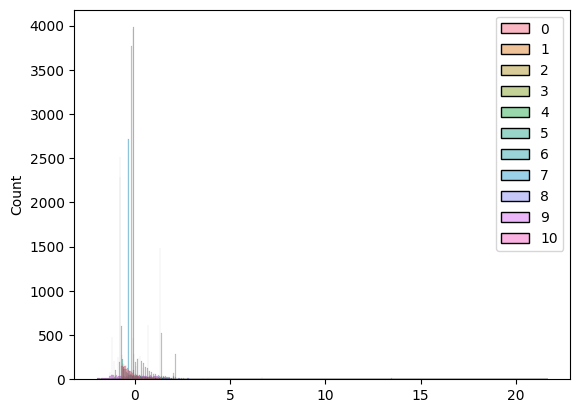

In [11]:
sns.histplot(ds_sc)

In [12]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(ds.iloc[:,5:]))
data

,0,1,2,3,4,5
0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...
3994,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


<Axes: ylabel='Count'>

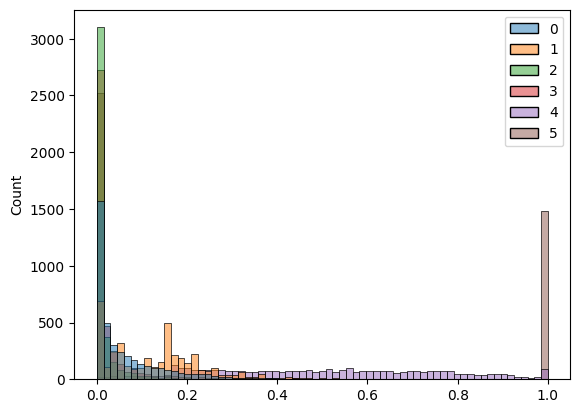

In [13]:
sns.histplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x78daa557fdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x78daa55a0f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x78daa5299010>,
 'medians': [<matplotlib.lines.Line2D at 0x78daa55a23d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x78daa55a2c90>,
 'means': []}

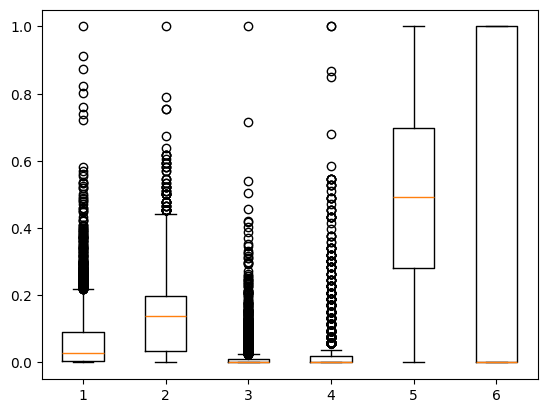

In [14]:
plt.boxplot(data)

In [15]:
data.head()

,0,1,2,3,4,5
0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


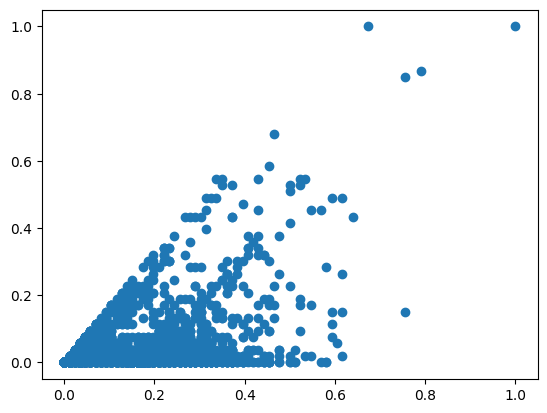

In [16]:
plt.scatter(data[1],data[3])

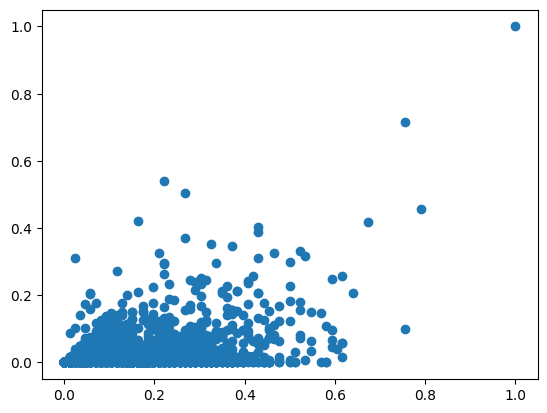

In [17]:
plt.scatter(data[1],data[2])

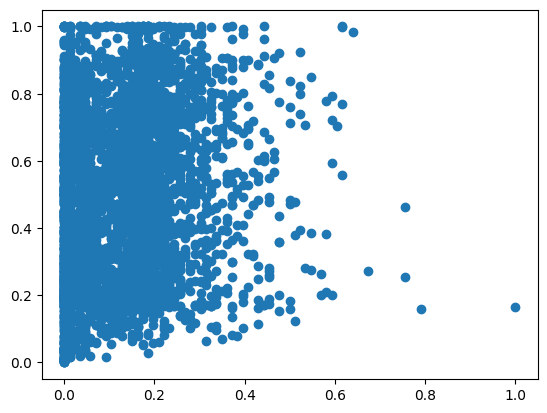

In [18]:
plt.scatter(data[1],data[4])

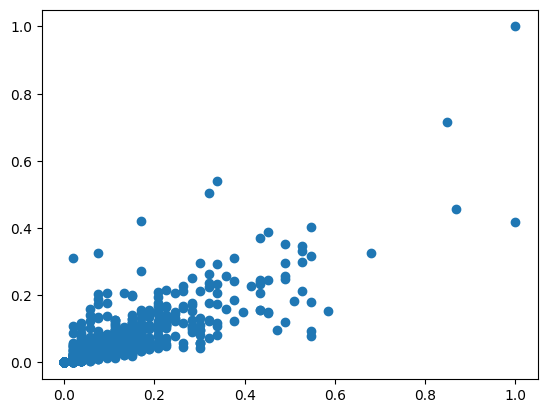

In [19]:
plt.scatter(data[3],data[2])

In [20]:
ds

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


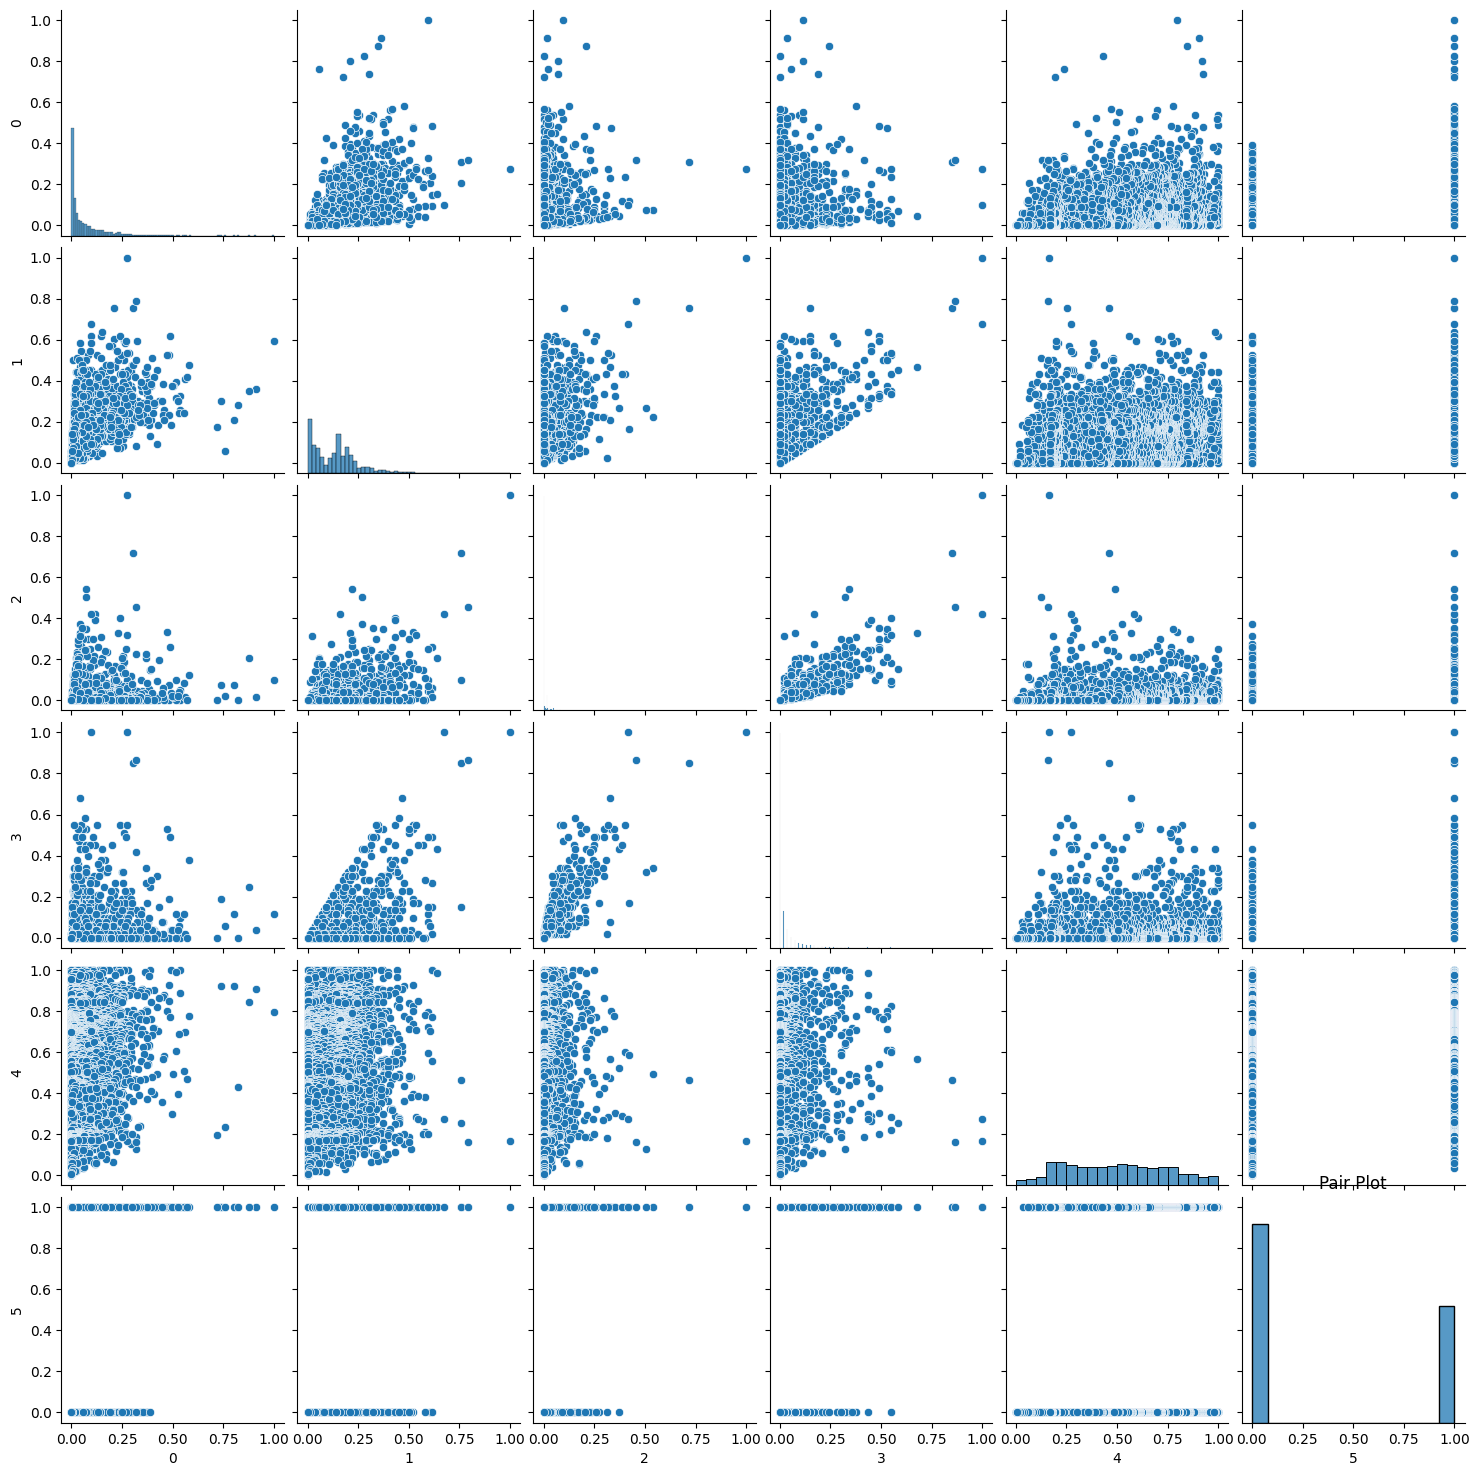

In [21]:
sns.pairplot(data)
plt.title('Pair Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Applying Clustering Models to Processed Data

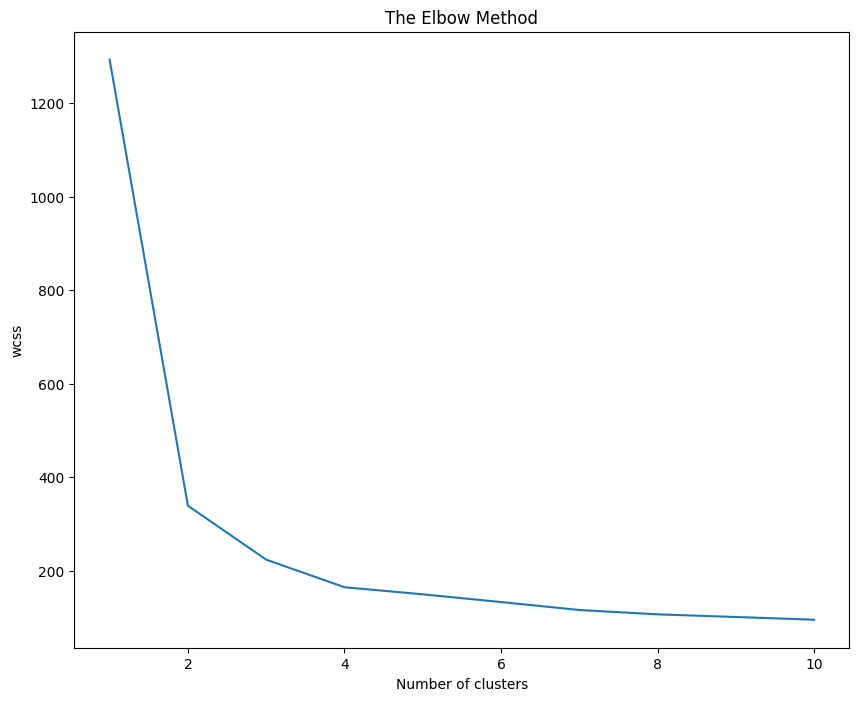

In [22]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters =i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


# taking 6 as Optimal cluster from Kmeans graph


In [23]:
kmeans = KMeans(n_clusters = 6)
y_means = kmeans.fit_predict(data)

In [24]:
y_means

array([1, 1, 1, ..., 3, 5, 5], dtype=int32)

In [25]:
kmeans.labels_

array([1, 1, 1, ..., 3, 5, 5], dtype=int32)

In [26]:
kmeans.cluster_centers_

array([[1.29824646e-01, 1.96239807e-01, 2.81194938e-02, 5.08943886e-02,
        7.47625572e-01, 1.00000000e+00],
       [5.28572787e-02, 1.20681869e-01, 7.21930578e-03, 1.27312695e-02,
        8.01603374e-01, 5.66213743e-15],
       [7.61659729e-02, 2.11692021e-01, 9.58426829e-03, 1.56523384e-02,
        2.65256522e-01, 1.38777878e-15],
       [8.77408306e-02, 1.69741275e-01, 2.75072844e-02, 4.70503941e-02,
        3.51385798e-01, 1.00000000e+00],
       [3.51802645e-02, 1.00112389e-01, 7.32251655e-03, 1.27188983e-02,
        5.22110906e-01, 3.49720253e-15],
       [8.96325352e-03, 4.01447624e-02, 6.18876011e-03, 9.54271111e-03,
        1.97037684e-01, 6.49480469e-15]])

In [27]:
kmeans.inertia_

133.07189247159172

In [28]:
md=pd.Series(y_means)  # converting numpy array into pandas series object
data['clust']=md # creating a  new column and assigning it to new column
data

,0,1,2,3,4,5,clust
0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...
3994,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,3
3995,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,3
3996,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,3
3997,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,5


In [29]:
data.groupby(data.clust).mean()

,0,1,2,3,4,5
clust,,,,,,
0,0.129596,0.196063,0.028047,0.050763,0.747144,1.0
1,0.052913,0.120791,0.007243,0.012773,0.802050,0.0
2,0.076211,0.212458,0.009568,0.015644,0.266309,0.0
3,0.087871,0.169859,0.027585,0.047183,0.350792,1.0
4,0.035197,0.099715,0.007313,0.012703,0.522500,0.0
5,0.009055,0.040464,0.006194,0.009542,0.196957,0.0


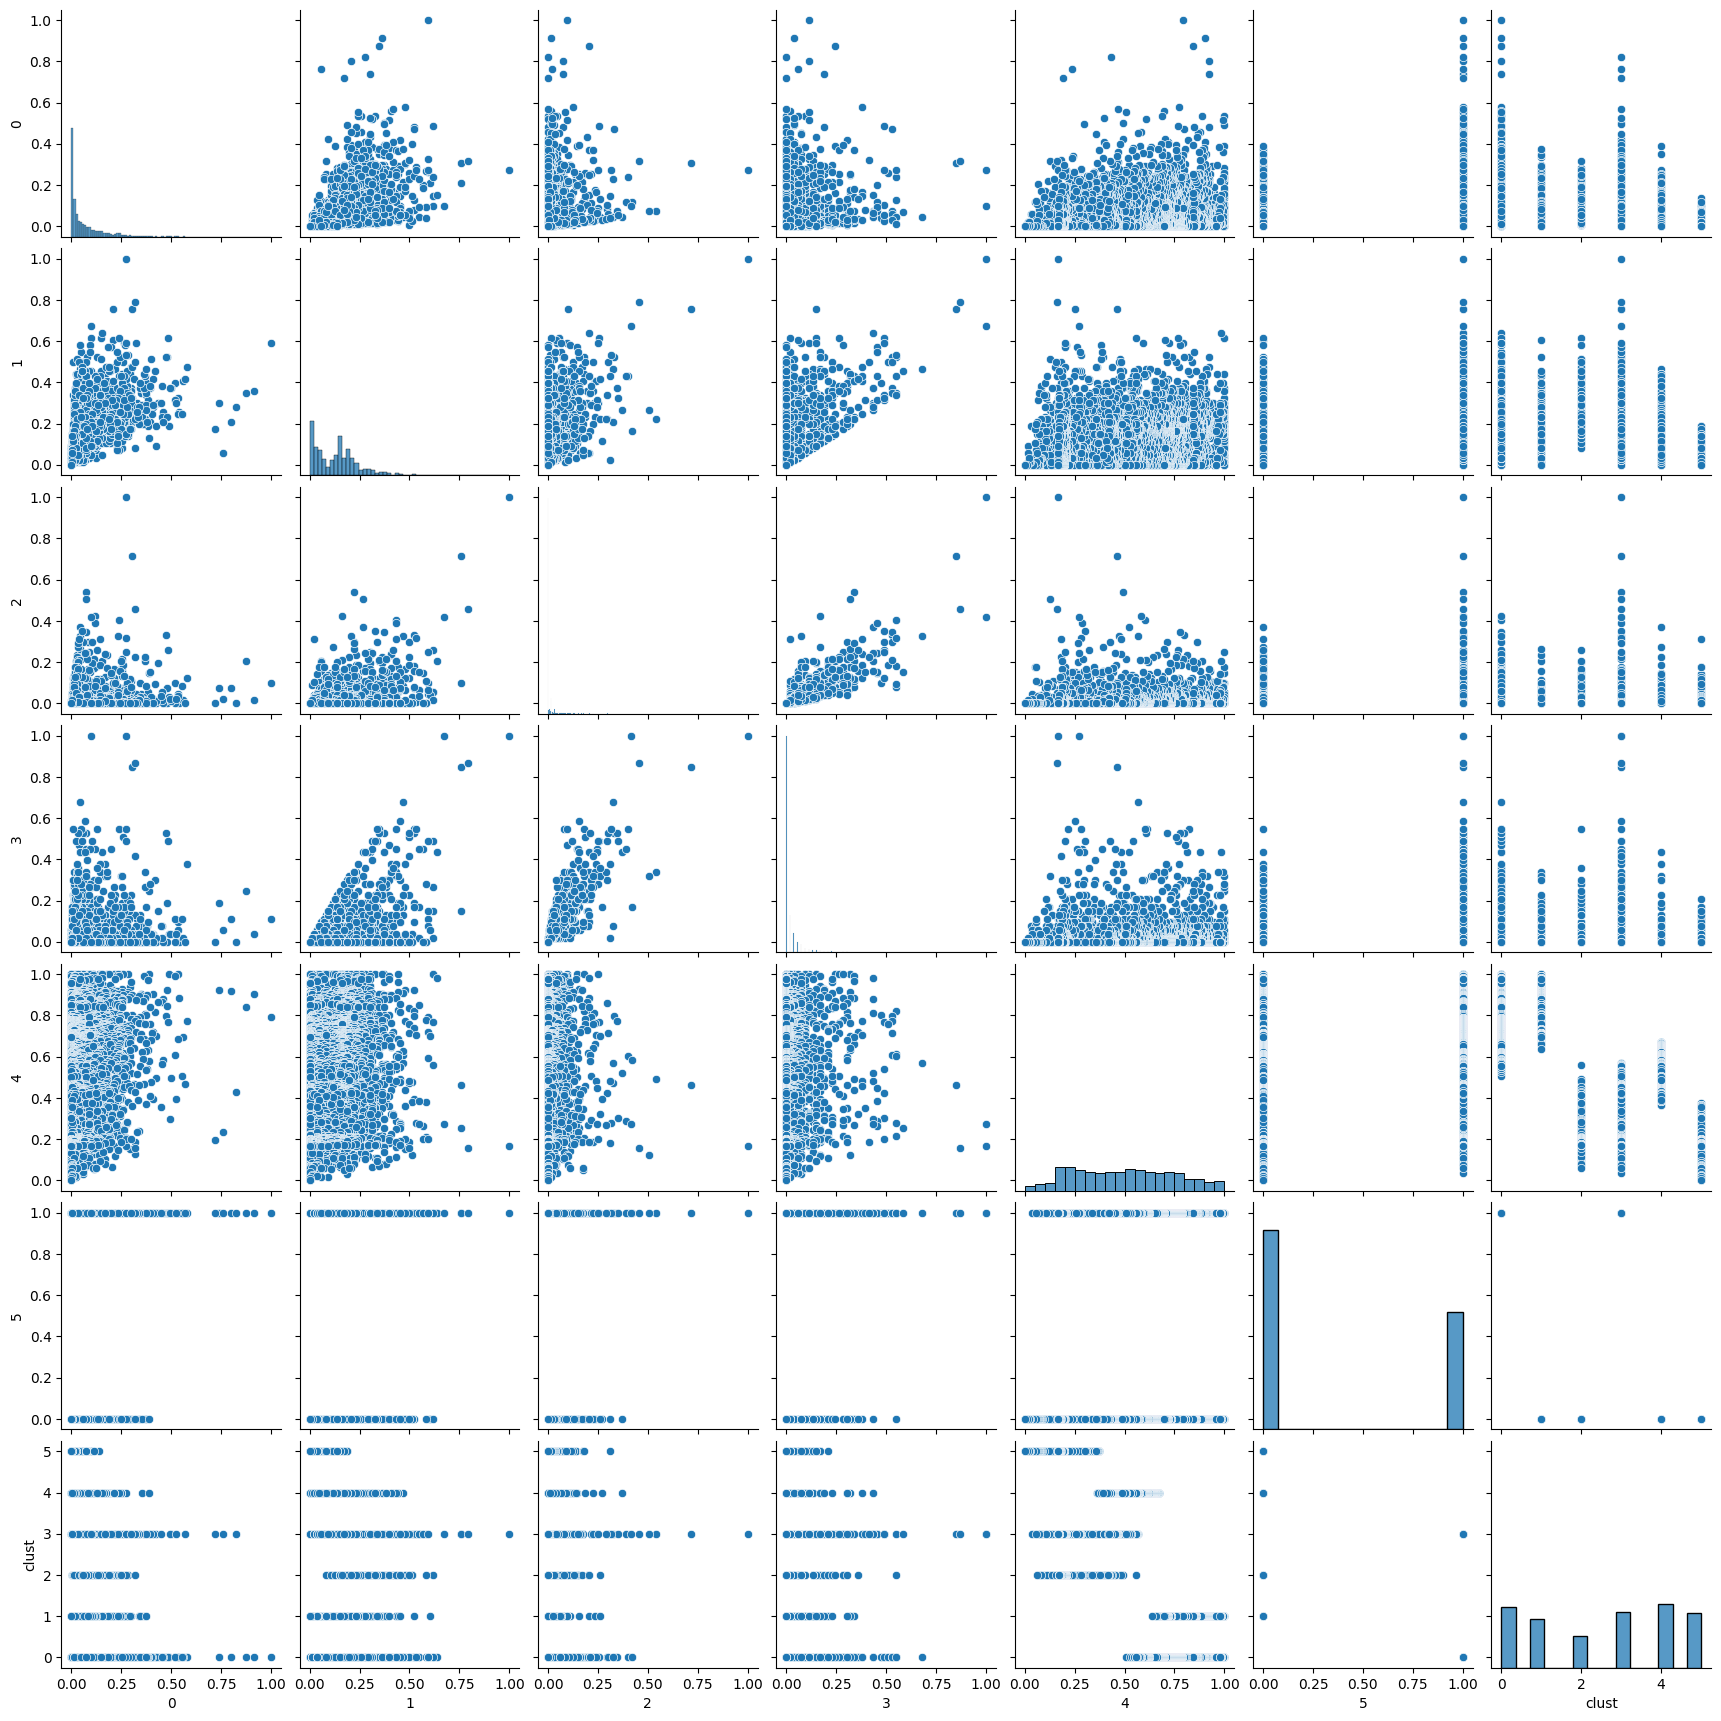

In [30]:
sns.pairplot(data)

In [37]:
data.head()

,0,1,2,3,4,5,clust
0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0


In [38]:
ds.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [39]:

from  sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(ds.iloc[:,:]))
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


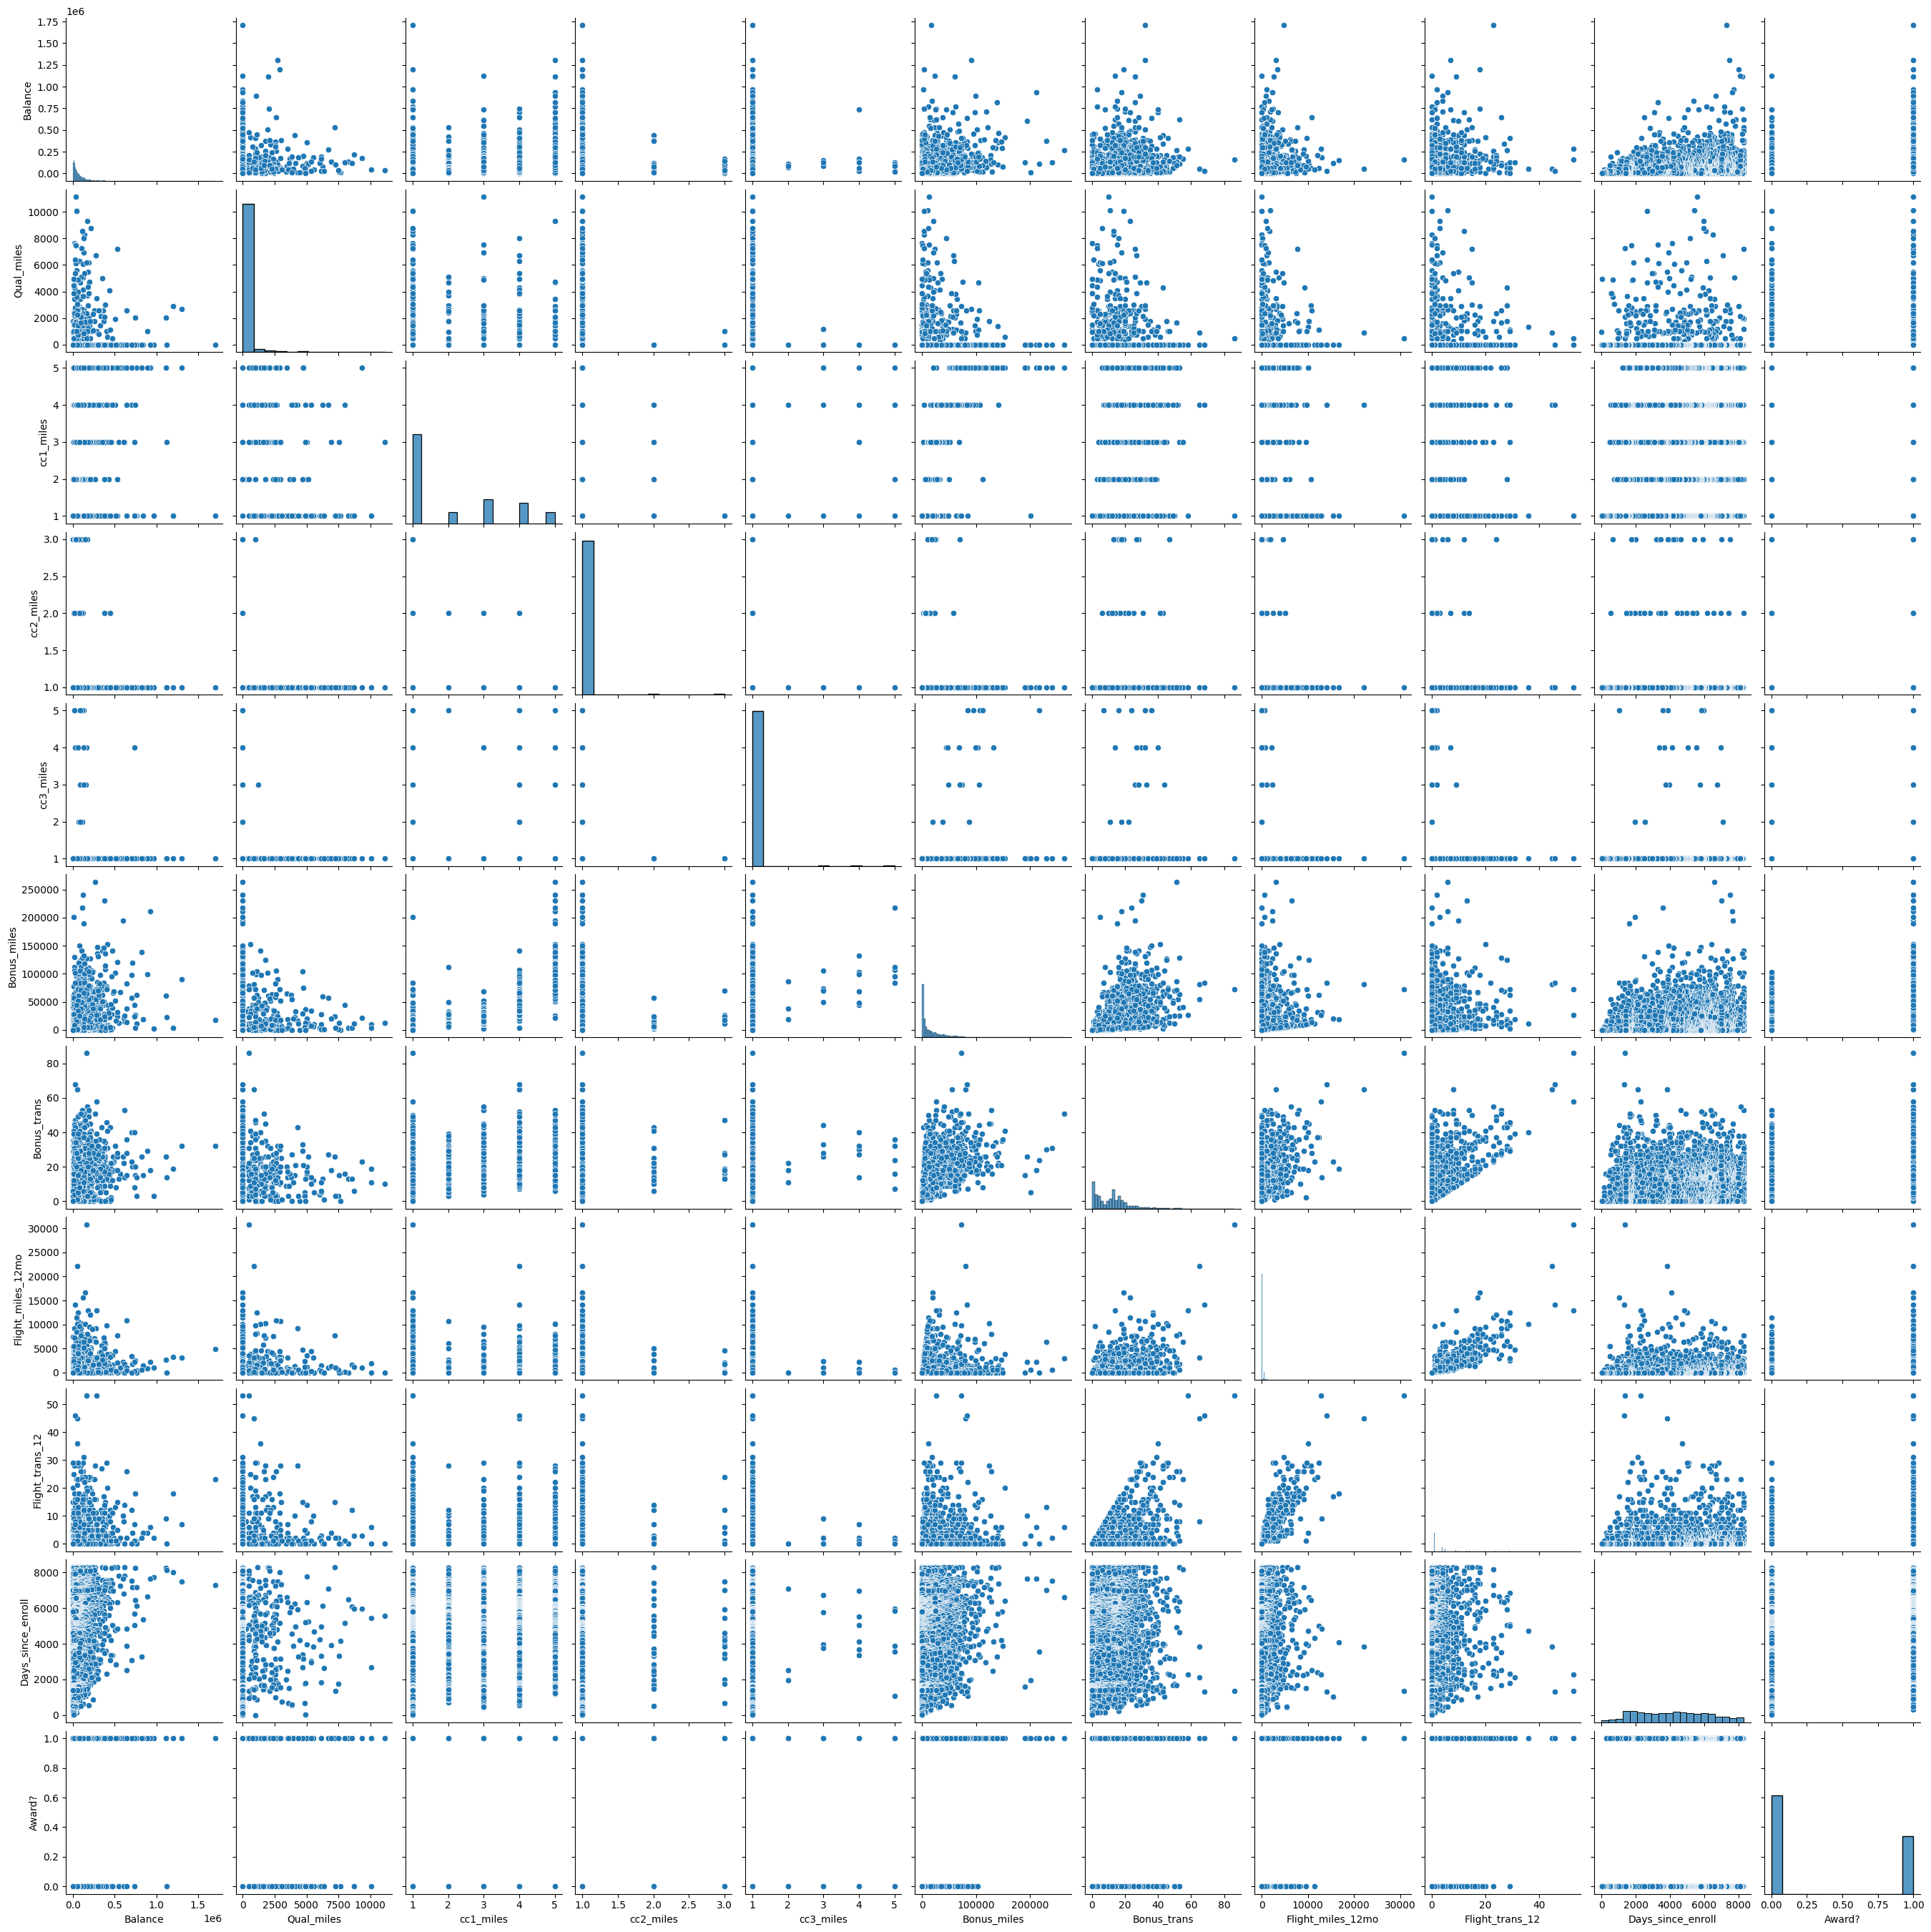

In [40]:
sns.pairplot(ds)

In [41]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


No null Values NO imputation required
# New Section

In [42]:
from sklearn.preprocessing import StandardScaler
ds_sc = StandardScaler()
ds_sc.fit(ds)
ds_sc=ds_sc.transform(ds)

In [43]:
type(ds_sc)

numpy.ndarray

In [44]:
print(ds_sc)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


<Axes: >

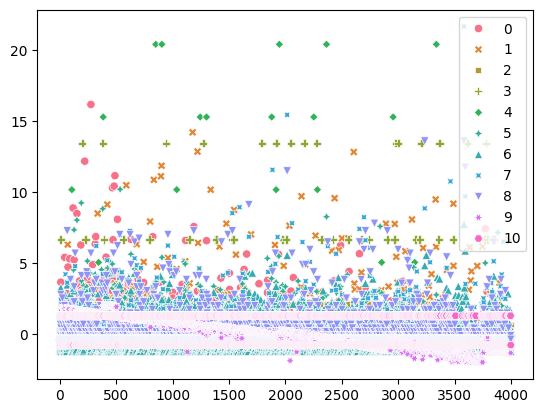

In [45]:
sns.scatterplot(ds_sc)

<Axes: ylabel='Count'>

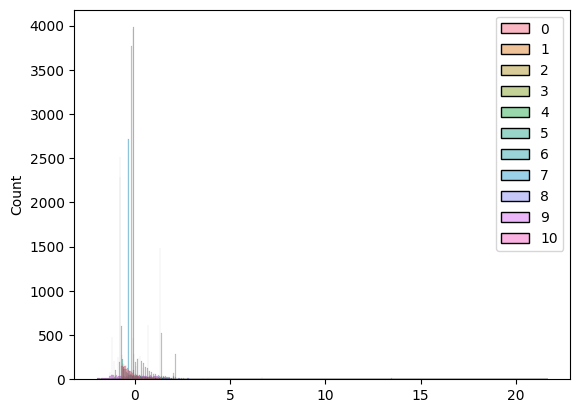

In [46]:
sns.histplot(ds_sc)

<Axes: >

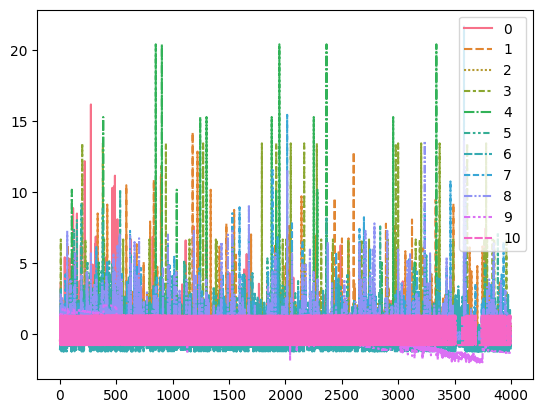

In [47]:
sns.lineplot(ds_sc)

In [48]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=1,min_samples=6)
db_scan = db_scan.fit(ds_sc)

In [49]:
db_scan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
cl=pd.DataFrame(db_scan.labels_,columns=['cluster'])

In [51]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [52]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(cl, method='ward')

<Axes: >

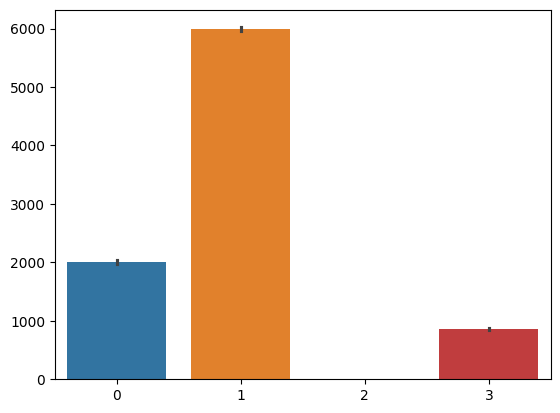

In [53]:
sns.barplot(Z)

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)





# Apply K-Means clustering

In [55]:

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Compute Silhouette Score

In [56]:

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for K-Means: {sil_score:.3f}")

Silhouette Score for K-Means: 0.848


In [58]:

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for K-Means: {sil_score:.3f}")

Silhouette Score for K-Means: 0.848


# Performing Dendrogram for Hierarchical Clustering

In [60]:
ds.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [72]:
ds.columns

Index(['Balance', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [74]:
ds = ds.drop(columns = ['cc1_miles', 'cc2_miles', 'cc3_miles'],axis = 1 )

In [75]:
ds

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,174,1,0,0,7000,0
1,19244,215,2,0,0,6968,0
2,41354,4123,4,0,0,7034,0
3,14776,500,1,0,0,6952,0
4,97752,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...
3994,18476,8525,4,200,1,1403,1
3995,64385,981,5,0,0,1395,1
3996,73597,25447,8,0,0,1402,1
3997,54899,500,1,500,1,1401,0


In [77]:
ds.isnull().sum()

,0
Balance,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0
Award?,0


In [78]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(ds)
ds_sc=sc_x.transform(ds)


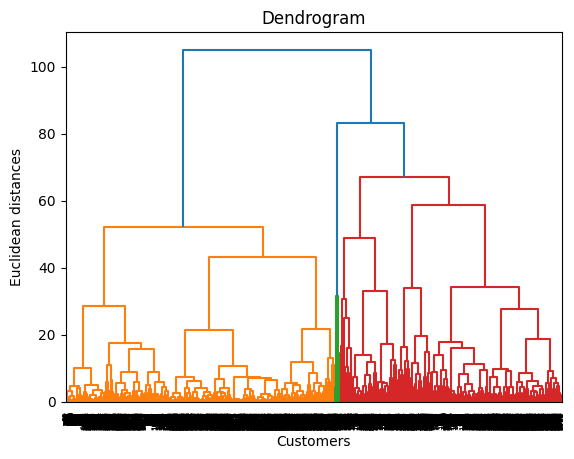

In [79]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(ds_sc, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Evaluating silhoutte score for DBSCAN

In [80]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [97]:
dbscan = DBSCAN(eps=2, min_samples=4)
labels = dbscan.fit_predict(X)


In [98]:
import numpy as np

# Check if at least 2 clusters exist
if len(set(labels) - {-1}) > 1:
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score cannot be calculated as there is only one cluster or all are noise points.")


Silhouette Score: 0.8480
